In [137]:
# NULL Hypothesis: The average trip duration for men is the same or lower than the average trip duration for women
# Alternative Hypothesis: The trip duration for men is longer than women
# H0: Average Trip Duration (men) <= Average Trip Duration (women)
# H1: Average Trip Duration (men) >  Average Trip Duration (women)
#significance level is 0.05

In [2]:
import pylab as pl
import pandas as pd
import numpy as np
import os
import json

%pylab inline

if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2018")


def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

Populating the interactive namespace from numpy and matplotlib
Must set env variable PUI2018


In [3]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [5]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)
df.head()

,tripduration,gender
0,1346,2
1,363,1
2,346,1
3,182,1
4,969,1


In [6]:
df['tripduration']= np.divide(df['tripduration'], 60) #converting trips from seconds to minutes

In [7]:
mean= df['tripduration'].mean()
std = np.std(df['tripduration'])
print(max(df['tripduration']))
print(std)
print(mean)
df_new = df[df['tripduration']<(mean+3*std)] #removing outliers
df_new = df_new[df_new['gender']>0] #keeping only the men and women data and removing the unknowns
men = df_new[df_new['gender']<1.5] #creating a separate dataframe for men
women = df_new[df_new['gender']>1.5] #creating a separate dataframe for women
new_mean = np.mean(df_new['tripduration'])
new_std = np.std(df_new['tripduration'])
print(new_mean)
print(new_std)

717.05
15.0129058496
10.9054263905
10.1024688371
6.79753563671


Text(0.5,0.01,'In this figure, the gender was plotted versus the trip duration. \n         The male users are shown in blue, and the female users are in red. \n         The mean of all users is also plotted for reference. ')

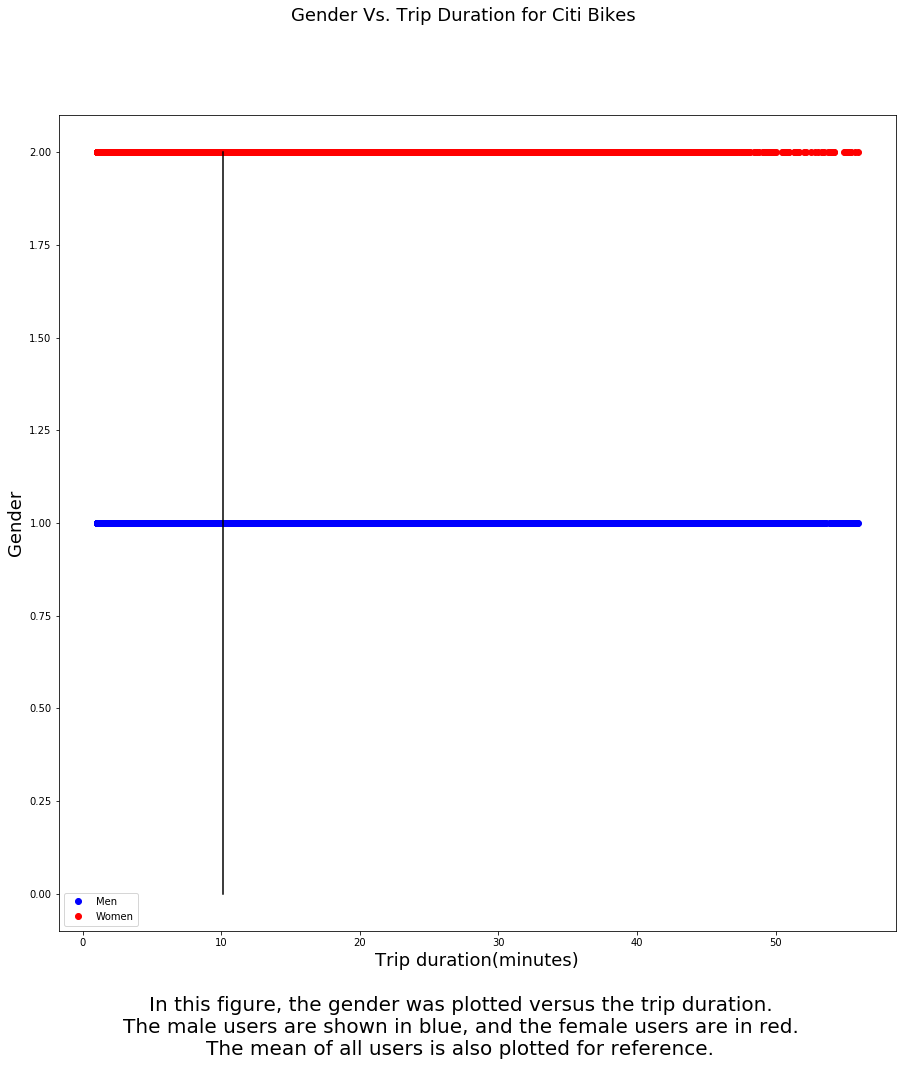

In [26]:
fig= pl.figure(figsize=(15,15)).add_subplot(111) 
fig.plot(men['tripduration'],men['gender'],'bo') 
fig.plot(women['tripduration'],women['gender'],'ro') 
fig.plot([new_mean, new_mean], [0,2],'k') 
pl.xlabel('Trip duration(minutes)', fontsize = 18) 
pl.ylabel('Gender', fontsize = 18) 
pl.suptitle('Gender Vs. Trip Duration for Citi Bikes', fontsize=18) 
pl.legend(['Men', 'Women'])
caption = """In this figure, the gender was plotted versus the trip duration. 
         The male users are shown in blue, and the female users are in red. 
         The mean of all users is also plotted for reference. """
pl.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=20)

In [17]:
men.shape

(227086, 2)

In [19]:
women.shape

(51905, 2)

In [47]:
men.tripduration.mean()

9.8973094627879608

In [16]:
women.tripduration.mean()

11.000047522717786

In [86]:
#Creating a subsample from the men sample that's equal in size to the women's sample
samplemen = men.sample(n=len(women), random_state=123)
samplemen.tripduration.mean()

9.9038554410300872

In [54]:
samplemen.shape

(51905, 2)

Text(0.5,0.98,"Men's trip duration distribution")

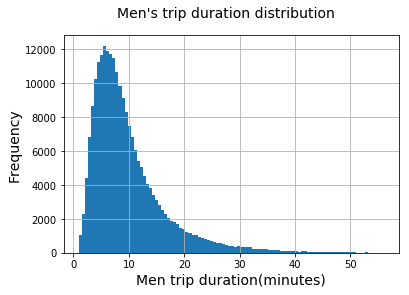

In [116]:
#Plotting the original men trip duration distribution
men.tripduration.hist(bins=100)
pl.xlabel('Men trip duration(minutes)', fontsize = 14) 
pl.ylabel('Frequency', fontsize = 14)
pl.suptitle("Men's trip duration distribution", fontsize=14) 

Text(0.5,0.98,"Men's trip duration distribution")

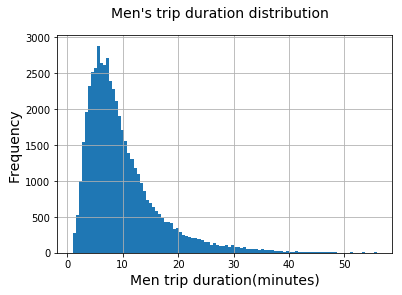

In [117]:
#Plotting the men subsample trip duration histogram
samplemen.tripduration.hist(bins=100)
pl.xlabel('Men trip duration(minutes)', fontsize = 14) 
pl.ylabel('Frequency', fontsize = 14)
pl.suptitle("Men's trip duration distribution", fontsize=14) 

Text(0.5,0.98,"Women's trip duration distribution")

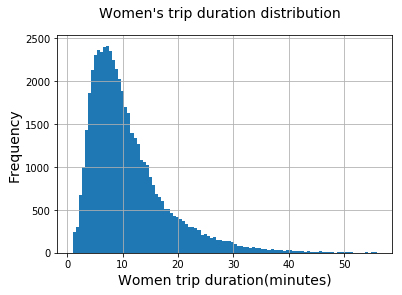

In [115]:
#Plotting the women trip duration histogram
women.tripduration.hist(bins=100)
pl.xlabel('Women trip duration(minutes)', fontsize = 14) 
pl.ylabel('Frequency', fontsize = 14)
pl.suptitle("Women's trip duration distribution", fontsize=14) 

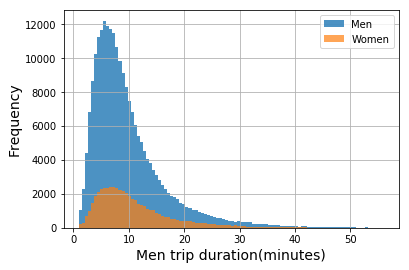

In [118]:
#Plotting the men and women distributions on top of each other 
men.tripduration.hist(bins=100, alpha=0.8)
women.tripduration.hist(bins=100, alpha=0.7)
pl.xlabel('Men trip duration(minutes)', fontsize = 14) 
pl.ylabel('Frequency', fontsize = 14)
pl.legend(['Men', 'Women'])

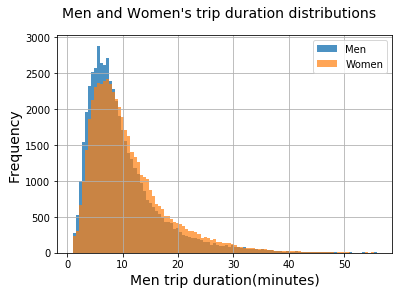

In [120]:
#Plotting the men and women distributions on top of each other 
samplemen.tripduration.hist(bins=100, alpha=0.8)
women.tripduration.hist(bins=100, alpha=0.7)
pl.xlabel('Men trip duration(minutes)', fontsize = 14) 
pl.ylabel('Frequency', fontsize = 14)
pl.suptitle("Men and Women's trip duration distributions", fontsize=14) 
pl.legend(['Men', 'Women'])

In [59]:
import scipy.stats

In [91]:
print(samplemen.tripduration.var())
print(women.tripduration.var())

44.6316956917
50.2106305529


In [92]:
#Since the two samples have different variance, the Welch's t-test is the test used
alpha = 0.05
t = scipy.stats.ttest_ind(samplemen.tripduration, women.tripduration, equal_var=False)
print(t)
print("From the t-test, the p-value is equal to ", t[1])
if t[1] >= alpha: 
    print ("The Null hypothesis cannot be rejected (p>=0.05)")
    print("The average trip duration for men is the same or lower than the average trip duration for women")
else: 
    print ("The Null hypothesis is rejected (p<0.05)")
    print("The trip duration for men is longer than women")

Ttest_indResult(statistic=-25.644259297461772, pvalue=1.391659521976752e-144)
From the t-test, the p-value is equal to  1.39165952198e-144
The Null hypothesis is rejected (p<0.05)
The trip duration for men is longer than women


In [94]:
#Doing it again but this time for the whole men sample without subsampling as a check
t = scipy.stats.ttest_ind(men.tripduration, women.tripduration, equal_var=False)
print(t)
print("From the t-test, the p-value is equal to ", t[1])
if t[1] >= alpha: 
    print ("The Null hypothesis cannot be rejected (p>=0.05)")
    print("The average trip duration for men is the same or lower than the average trip duration for women")
else: 
    print ("The Null hypothesis is rejected (p<0.05)")
    print("The trip duration for men is longer than women")

Ttest_indResult(statistic=-32.296760954941405, pvalue=2.8893025653359721e-227)
From the t-test, the p-value is equal to  2.88930256534e-227
The Null hypothesis is rejected (p<0.05)
The trip duration for men is longer than women
